tento kod slouzi k nalezeni cervenych krabicek na baterie 

In [260]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt

nastaveni thasholdu pro danou barvu co hledam 

In [261]:
low = np.array([0,0,0])#deafult 160,50,100
high = np.array([255,255,60])

nacteni obrazku

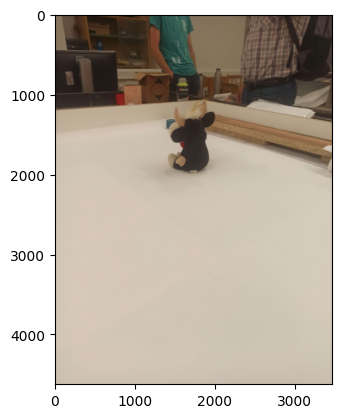

In [262]:
img = cv2.imread('420.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [263]:
img_height,img_width,img_channels = img.shape
print('width',img_width,'Px')
print('height',img_height,'Px')
print('channels',img_channels)

width 3472 Px
height 4624 Px
channels 3


aplikace masky 

3245 1232 227 81
1463 1223 532 737
1248 1011 96 63
1246 774 147 97
1056 765 89 121
1420 726 427 370
1431 668 272 79
1352 520 121 126
0 458 1077 716
2888 406 86 268
134 131 295 323
1165 72 132 127
395 3 762 572
2328 0 1144 1141
1296 0 185 549
715 0 276 48
[1272.5, 1591.5, 1042.5, 822.5, 825.5, 911.0, 707.5, 583.0, 816.0, 540.0, 292.5, 135.5, 289.0, 570.5, 274.5, 24.0]


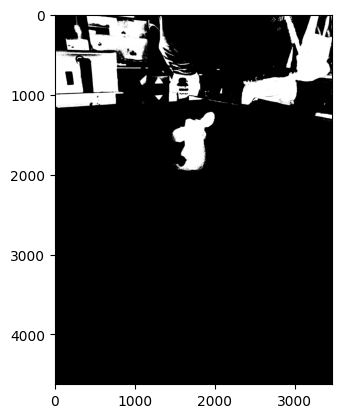

In [264]:
cordinates = []
cor = []
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(img,low,high)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )
if len(contours) != 0:
    for contour in contours:
        if (cv2.contourArea(contour) > 2000) and (cv2.contourArea(contour) < 2000000):
            x,y,w,h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,255),5)
            print(x,y,w,h)
            xs = x + w/2
            ys = y + h/2
            c= ys,xs
            cordinates.append(ys)
            cor.append(c)
print(cordinates)

plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

In [265]:
#vypocet
xx = img_width/2
yy = img_height/2
cordinates.sort()
cor.sort()
print(cordinates)
def finde():
    for value in cordinates:
        if value >= yy:
            return value
    return cordinates[-1]
yt = finde()
print(yt)
i = cordinates.index(yt)
print(i)
x,y = cor[i]
print(x,y)




[24.0, 135.5, 274.5, 289.0, 292.5, 540.0, 570.5, 583.0, 707.5, 816.0, 822.5, 825.5, 911.0, 1042.5, 1272.5, 1591.5]
1591.5
15
1591.5 1729.0


zobrazeni vysledku

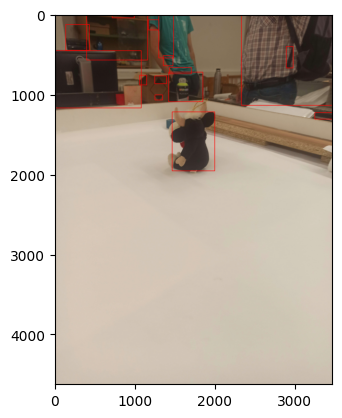

In [266]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB))